### Machine Learning para predição de Churn ###

* Manipulação dos dados
* Análise Exploratória dos dados
* Pré-processamento dos dados
* Machine Learning


<img src="images/churn-rate.jpg" width=600 height=200 />

**Features do dataset**

Numéricas:
* MonthlyCharges: o valor pago mensalmente pelo cliente
* TotalCharges: o valor total pago pelo cliente (life time value)

Categóricas:

* CustomerID: ID do cliente
* gender: sexo do cliente
* SeniorCitizen: indica se o cliente é idoso ou não (1,0)
* Partner: indica se o cliente possui um parceiro ou não (Yes,No)
* Dependentes: indica se o cliente possui dependentes ou não (Yes,No)
* Tenure: número de meses que o cliente utilizou o serviço
* PhoneService: indica se o cliente possui telefone (Yes, No)
* MultipleLines: indica se o cliente possui multiplas linhas de telefone ou nao (Yes,No, No phone service)
* InternetService: o provedor de serviço de internet do cliente (DSL, Fiber Optic, No)
* OnlineSecurity: indica se o cliente possui segurança online (Yes,No, No internet service)
* OnlineBackup: indica se o cliente possui backup Online (Yes, No, No internet service)
* DeviceProtection: indica se o cliente possui proteção de dispoitivo (Yes,  No, No internet service)
* TechSupport: indica se o cliente possui suporte técnico (Yes, No, No internet service)
* StreammingTV: indica se o cliente possui streaming de TV(Yes, No, No internet service)
* StreamingMovies: indica se o cliente possui streaming de filmes(Yes, No, No internet service)
* Contract: tipo de contrato do cliente (Month-to-month, one year, two years)
* PaperlessBilling: indica se o cliente recebe a conta sem ser no modo impresso (yes, no)
* PaymentMethod: o método de pagamento do cliente (Eletronic Check, Mailed Check, Bank transfer, Credit Card)

In [1]:
# Bibliotecas Utilizadas

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
telco = pd.read_csv('datasets/Telco-Customer-Churn.csv')
telco.shape
# 7.043 LINHAS E 21 COLUNAS

(7043, 21)

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Convertendo as colunas categóricas para categorias

colunas = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
           'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

df_col=list(colunas)

for i in range(len(df_col)):
    telco[df_col[i]] = telco[df_col[i]].astype('category')

In [6]:
telco['tenure'] = telco['tenure'].astype('int64')
telco['TotalCharges'] = pd.to_numeric(telco.TotalCharges, errors='coerce')

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [8]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Analise Exploratória dos dados ###

**% de Churn em relação ao gender**

In [ ]:
telco[['gender','Churn']].groupby(['gender']).mean()

**% de Churn em relação a SeniorCitizen**

In [ ]:
telco[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

**% de Churn em relação a Partner**

In [ ]:
telco[['Partner','Churn']].groupby(['Partner']).mean()

**% de Churn em relação a Partner**

In [ ]:
telco[['tenure','Churn']].groupby(['tenure']).mean()

**% de Churn em relação a TechSupport (Suporte Técnico)**

In [ ]:
telco[['TechSupport','Churn']].groupby(['TechSupport']).mean()

In [ ]:
# Plotando as correlações entre as features numéricas
telco.corr()

In [ ]:
df_corr = telco.apply(lambda x: pd.factorize(x)[0])
df_corr.corr()

### Pré-Processamento ###

In [9]:
telco.drop(['customerID','gender','TotalCharges'], axis=1, inplace=True)
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [11]:
le = preprocessing.LabelEncoder()

colunas = ['SeniorCitizen','Partner','PhoneService','Dependents','MultipleLines',
		'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
		'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Contract']

df_col=list(colunas)

for i in range(len(df_col)):
    telco[df_col[i]] = le.fit_transform(telco[df_col[i]])

In [ ]:
cat_features = ['SeniorCitizen','Partner','PhoneService','Dependents','MultipleLines',
		'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
		'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Contract']
telco = pd.get_dummies(telco, columns=cat_features, drop_first=True)

In [12]:
# MinMaxScaler para padronizar os dados numéricos 
sc = StandardScaler()
telco['tenure'] = sc.fit_transform(telco[['tenure']])
telco['MonthlyCharges'] = sc.fit_transform(telco[['MonthlyCharges']])

min_max_scaler = preprocessing.MinMaxScaler()
telco['tenure'] = min_max_scaler.fit_transform(telco[['tenure']])
telco['MonthlyCharges'] = min_max_scaler.fit_transform(telco[['MonthlyCharges']])

In [13]:
# Verificando se as classes estão desbalanceadas
telco['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
# Separando as features e class
X = telco.drop("Churn",axis=1)
y = telco['Churn']

**Balanceamento das classes**

In [15]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X, y = smt.fit_resample(X, y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=40)

### Aplicando Random Forest ###

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

In [23]:
resultado = model.predict(X_test)
resultado_prob = model.predict_proba(X_test)

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

          No       0.84      0.80      0.82      1779
         Yes       0.81      0.86      0.83      1843

    accuracy                           0.83      3622
   macro avg       0.83      0.83      0.83      3622
weighted avg       0.83      0.83      0.83      3622



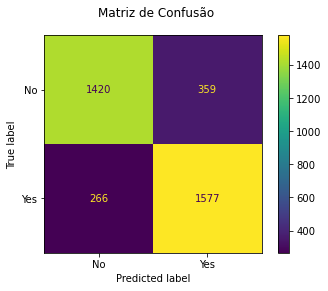

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(model,X_test,y_test)
disp.figure_.suptitle('Matriz de Confusão')
plt.show()

In [30]:
resultado_rf = model.predict(X_test)
resultado_rf_prob = model.predict_proba(X_test)
rf_final = pd.DataFrame(np.hstack((resultado_rf.reshape(-1, 1), resultado_rf_prob)))
rf_final.rename(columns={0: "Churn", 1: "% Não", 2:"% Sim"},inplace=True)

In [31]:
rf_final.head()

,Churn,% Não,% Sim
0,No,1,0
1,Yes,0.11,0.89
2,Yes,0.01,0.99
3,Yes,0.09,0.91
4,Yes,0.24,0.76
